In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [49]:
# Loading iris dataset
iris = datasets.load_iris()
df = pd.DataFrame(iris.data)
print(df.head())
df_target = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df_target['target'] = iris.target
print(df_target['target'])

     0    1    2    3
0  5.1  3.5  1.4  0.2
1  4.9  3.0  1.4  0.2
2  4.7  3.2  1.3  0.2
3  4.6  3.1  1.5  0.2
4  5.0  3.6  1.4  0.2
0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int32


In [50]:
# Create the numpy array from DataFrame
numpy_array = df.to_numpy()
numpy_array[:5], numpy_array.shape
x = numpy_array
y = df_target['target'].values

In [34]:
# Dropping the target column to perform PCA calculation
# x = numpy_array[:,:-1]
# x[:4], x.shape

In [35]:
# Finding the mean of each column of x
x_mean = x.mean(axis=0)
x_mean

array([5.84333333, 3.05733333, 3.758     , 1.19933333])

In [36]:
# Normalizing x by subtracting each values by x_mean
normalized_x = x - x_mean
normalized_x[:4]

array([[-0.74333333,  0.44266667, -2.358     , -0.99933333],
       [-0.94333333, -0.05733333, -2.358     , -0.99933333],
       [-1.14333333,  0.14266667, -2.458     , -0.99933333],
       [-1.24333333,  0.04266667, -2.258     , -0.99933333]])

In [37]:
# Calculating the covariance matrix of x
x_cov_matrix = np.cov(normalized_x.T)   # Taking tranpose to get matrix of (4*4) else (150*150) matrix will be formed
x_cov_matrix, x_cov_matrix.shape

(array([[ 0.68569351, -0.042434  ,  1.27431544,  0.51627069],
        [-0.042434  ,  0.18997942, -0.32965638, -0.12163937],
        [ 1.27431544, -0.32965638,  3.11627785,  1.2956094 ],
        [ 0.51627069, -0.12163937,  1.2956094 ,  0.58100626]]),
 (4, 4))

In [38]:
# Finding the eigen values and eigen vectors of covariance matrix of x
eigen_valuesX, eigenVectorsX = np.linalg.eig(x_cov_matrix)
eigen_valuesX, eigenVectorsX

(array([4.22824171, 0.24267075, 0.0782095 , 0.02383509]),
 array([[ 0.36138659, -0.65658877, -0.58202985,  0.31548719],
        [-0.08452251, -0.73016143,  0.59791083, -0.3197231 ],
        [ 0.85667061,  0.17337266,  0.07623608, -0.47983899],
        [ 0.3582892 ,  0.07548102,  0.54583143,  0.75365743]]))

In [43]:
# Since the values are in the sorted form, we just proceed without sorting
# proportion of variance = sum of eigen value of 1 to m/sum of eigen value of 1 to m to n
sum_of_proportion = 0
for i in range(0,4):
    proportion = eigen_valuesX[i]/np.sum(eigen_valuesX)
    print(proportion)
    sum_of_proportion = sum_of_proportion + proportion
sum_of_proportion

0.9246187232017269
0.05306648311706796
0.017102609807929728
0.005212183873275378


1.0

In [40]:
# Calculating Y = P*x where P is row wise eigen vector
Y = np.dot(eigenVectorsX.T, x.T)
Y.T[:4], Y.shape

(array([[ 2.81823951, -5.64634982, -0.65976754, -0.03108928],
        [ 2.78822345, -5.14995135, -0.84231699,  0.06567484],
        [ 2.61337456, -5.18200315, -0.61395246, -0.01338332],
        [ 2.75702228, -5.0086536 , -0.60029334, -0.10892753]]),
 (4, 150))

In [41]:
Y_cov_matrix = np.cov(Y)
Y_cov_matrix

array([[ 4.22824171e+00, -2.38437160e-17, -9.53748639e-17,
         1.01335793e-15],
       [-2.38437160e-17,  2.42670748e-01, -4.50050139e-16,
         3.22449003e-16],
       [-9.53748639e-17, -4.50050139e-16,  7.82095000e-02,
         2.19064140e-16],
       [ 1.01335793e-15,  3.22449003e-16,  2.19064140e-16,
         2.38350930e-02]])

<Figure size 800x600 with 0 Axes>

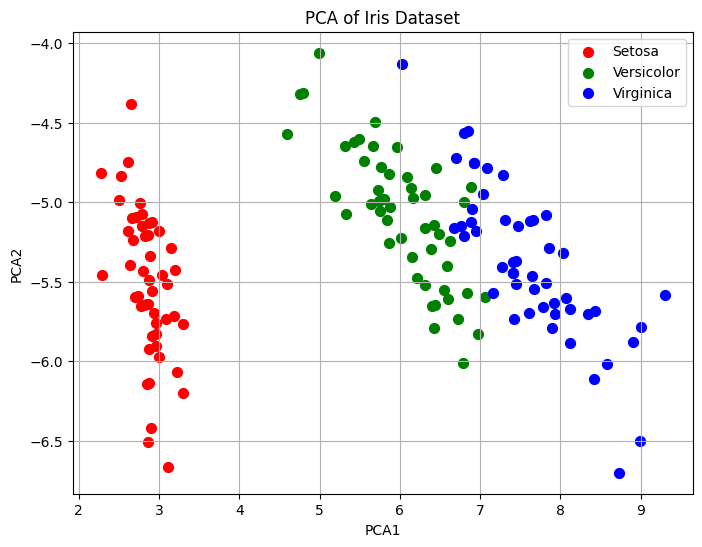

In [52]:
PC1 = Y[0,:]
PC2 = Y[1,:]
PC3 = Y[2,:]
targets = ['Setosa', 'Versicolor','Virginica']
colors = ['r' ,'g', 'b']
plt.figure(figsize=(8, 6))
plt.figure(figsize=(8, 6))
for target, color in zip(targets, colors):
    indicesToKeep = (y == targets.index(target))
    plt.scatter(PC1[indicesToKeep],
                PC2[indicesToKeep],
                c=color,
                s=50,
                label=target)
    
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('PCA of Iris Dataset')
plt.legend(targets)
plt.grid(True)
plt.show()

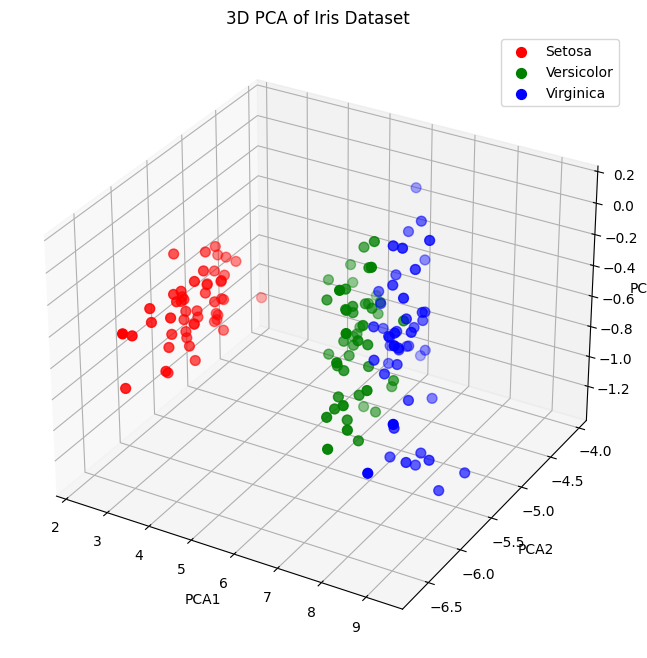

In [54]:
# 3D plot for PCA1, PCA2, and PCA3
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

for target, color in zip(targets, colors):
    indicesToKeep = (y == targets.index(target))
    ax.scatter(PC1[indicesToKeep], PC2[indicesToKeep], PC3[indicesToKeep], c=color, s=50, label=target)

ax.set_xlabel('PCA1')
ax.set_ylabel('PCA2')
ax.set_zlabel('PCA3')
ax.set_title('3D PCA of Iris Dataset')
ax.legend(targets)
plt.show()